#Emirhan Aykan

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import spacy
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [ ]:
filtered_data = pd.read_csv('/content/drive/MyDrive/dev-workshop-git/hilary/FilteredEmails.csv', header=0)

In [ ]:
filtered_data['ExtractedBodyText']

0       B6\nThursday, March 3, 2011 9:45 PM\nH: Latest...
1                                                     Thx
2       H <hrod17@clintonemail.com>\nFriday, March 11,...
3       Pis print.\n-•-...-^\nH < hrod17@clintonernail...
4       H <hrod17@clintonemail.corn>\nFriday, March 11...
                              ...                        
6737    Hi. Sorry I haven't had a chance to see you, b...
6738    B6\nI assume you saw this by now -- if not, it...
6739    Big change of plans in the Senate. Senator Rei...
6740    PVerveer B6\nFriday, December 17, 2010 12:12 A...
6741                                           See below.
Name: ExtractedBodyText, Length: 6742, dtype: object

## Preprocessing

In [ ]:
def clean_text(text):
    # Remove unnecessary characters, symbols, and punctuation
    cleaned_text = re.sub(r'[^\w\s]', '', text)
    return cleaned_text

filtered_data['PpBody'] = filtered_data['ExtractedBodyText'].apply(clean_text)

In [ ]:
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    tokens = text.split()
    filtered_tokens = [token for token in tokens if token.lower() not in stop_words]
    return ' '.join(filtered_tokens)

filtered_data['PpBody'] = filtered_data['PpBody'].apply(remove_stopwords)

In [ ]:
filtered_data['PpBody'][0]

'B6 Thursday March 3 2011 945 PM H Latest Syria aiding Qaddafi Sid hrc memo syria aiding libya 030311docx hrc memo syria aiding libya 030311docx March 3 2011 Hillary'

In [ ]:
filtered_data['ExtractedBodyText'][0]

'B6\nThursday, March 3, 2011 9:45 PM\nH: Latest How Syria is aiding Qaddafi and more... Sid\nhrc memo syria aiding libya 030311.docx; hrc memo syria aiding libya 030311.docx\nMarch 3, 2011\nFor: Hillary'

In [ ]:
body_text = filtered_data["PpBody"]

In [ ]:
nlp = spacy.load("en_core_web_sm")

In [ ]:
noun_phrases = {}
verbs = {}
no_ph = []
ve = []

for text in body_text:
    doc = nlp(text)

    no_ph = [chunk.text for chunk in doc.noun_chunks]
    ve = [token.lemma_ for token in doc if token.pos_ == "VERB"]
    for i in range(len(ve)):
      if(ve[i] in verbs):
        verbs[ve[i]] += 1
      else:
        verbs[ve[i]] = 1
    ve = []

In [ ]:
verbs

{'aid': 16,
 'send': 588,
 'httemaxbiumenthalcom1201209meettherightwingextremistbehindantimusiimtihnthatsparke': 1,
 'SENSITIVE': 217,
 'redaction': 127,
 'hrod17clintonemailcorn': 3,
 'libya': 2,
 'appear': 151,
 'ope': 19,
 'want': 818,
 'make': 1083,
 'say': 2111,
 'tighten': 10,
 'dither': 1,
 'retake': 4,
 'temporize': 1,
 'call': 847,
 'authorize': 26,
 'put': 299,
 'hold': 276,
 'argue': 69,
 'sell': 58,
 'term': 13,
 'expect': 161,
 'support': 229,
 'begin': 270,
 'provide': 235,
 'decrease': 2,
 'imagine': 30,
 'counterproductive': 1,
 'include': 506,
 'come': 676,
 'perspective': 5,
 'play': 152,
 'allow': 170,
 'fall': 97,
 'weigh': 10,
 'ask': 524,
 'keep': 222,
 'assume': 67,
 'impose': 27,
 'establish': 86,
 'work': 629,
 'stop': 107,
 'continue': 264,
 'bomb': 9,
 'depot': 1,
 'assess': 6,
 'cultivate': 4,
 'regard': 95,
 'time': 13,
 'use': 289,
 'gain': 40,
 'take': 777,
 'renew': 20,
 'negotiate': 71,
 'know': 865,
 'get': 1044,
 'follow': 309,
 'certainty': 1,
 'win'

In [ ]:
import matplotlib.pyplot as plt

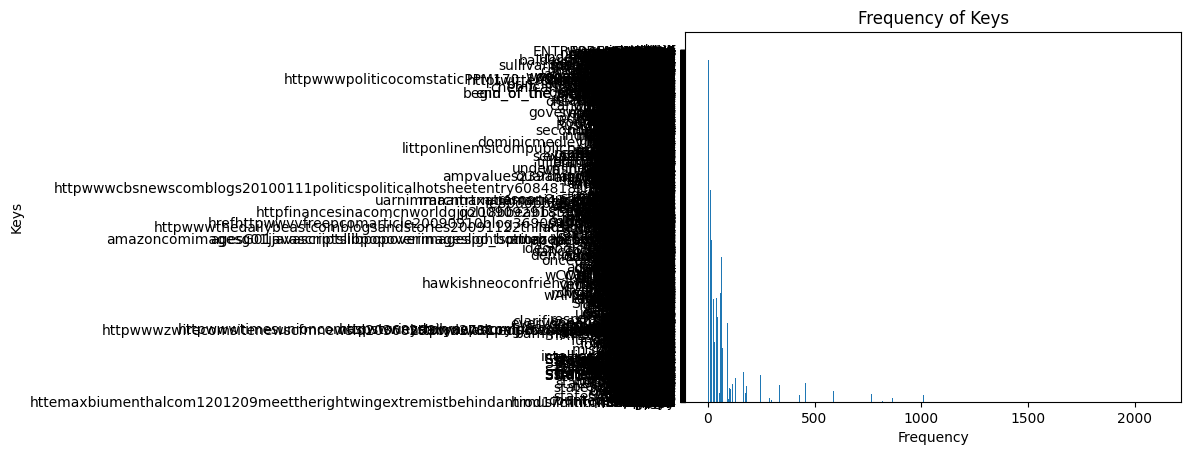

In [ ]:
keys = list(verbs.keys())
values = list(verbs.values())
plt.bar(values, keys)

plt.ylabel('Keys')
plt.xlabel('Frequency')
plt.title('Frequency of Keys')

plt.show()

In [ ]:
event_log = []

In [ ]:
for text in body_text:
    doc = nlp(text)
    noun_phrases = [chunk.text for chunk in doc.noun_chunks]

    for token in doc:
        if token.pos_ == "VERB":
            verb = token.lemma_
            noun_phrase = None

            for np in noun_phrases:
                if token.i > 0 and doc[token.i - 1].head.text == np:
                    noun_phrase = np
                    break

            if noun_phrase is not None:
                event_log.append((noun_phrase, verb))

In [ ]:
for event in event_log:
    print(f"Event: {event[0]} - Verb: {event[1]}")

Event: H - Verb: hrod17clintonemailcorn
Event: terms - Verb: term
Event: attacks - Verb: consulate
Event: Americans - Verb: portray
Event: people - Verb: seek
Event: Chad - Verb: overthrow
Event: rebels - Verb: work
Event: Chad - Verb: state
Event: officers - Verb: follow
Event: rebels - Verb: judge
Event: participants - Verb: consist
Event: intelligence - Verb: access
Event: evidence - Verb: evidence
Event: words - Verb: wish
Event: events - Verb: look
Event: values - Verb: value
Event: values - Verb: think
Event: mistake - Verb: mistake
Event: status - Verb: work
Event: rebels - Verb: rebel
Event: office - Verb: say
Event: investigation - Verb: take
Event: time - Verb: tell
Event: TAPPER - Verb: tapper
Event: presence - Verb: remain
Event: lets - Verb: look
Event: developments - Verb: tell
Event: funds - Verb: come
Event: efforts - Verb: get
Event: militias - Verb: see
Event: cable - Verb: say
Event: gangs - Verb: intimidate
Event: talk - Verb: talk
Event: possibility - Verb: find
Ev